<a href="https://colab.research.google.com/github/revin357/Car_classifier/blob/master/boundary_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install modules for python relating to tensorflow and saving and loading models
!pip install -U tensorflow_hub
!pip install tf-nightly-gpu
!pip install -q h5py pyyaml

# Allows colaboratory to access the google drive and mounts it in the content directory
from google.colab import drive
drive.mount('/content/gdrive')


from __future__ import absolute_import, division, print_function, unicode_literals

# Imports modules needed for execution of the program
import os

import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
#tf.enable_eager_execution()

import tensorflow_hub as hub
from tensorflow.keras import layers
from keras.models import load_model

import os
import numpy as np
import PIL.Image as Image

Requirement already up-to-date: tensorflow_hub in /usr/local/lib/python3.6/dist-packages (0.4.0)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Using TensorFlow backend.


In [2]:
# Creates car_classifier_model variable using the car_classifier_model.h5 saved model file in google drive
car_classifier_model = keras.models.load_model('../content/gdrive/My Drive/Software Engineering Practice/Model/car_classifier_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})
# Displays a summary of the car_classifier_model
car_classifier_model.summary()

W0511 23:51:35.926294 140665929340800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0511 23:51:38.080041 140665929340800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0511 23:51:38.086031 140665929340800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 196)               251076    
Total params: 2,509,060
Trainable params: 251,076
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
# Assigns a size to the varaiable IMAGE_SHAPE
IMAGE_SHAPE = (224,224)

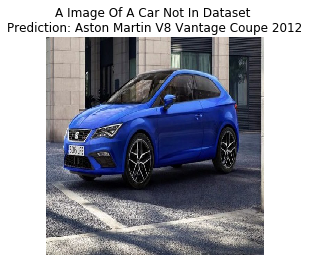

In [4]:
# Takes a file to test in the model
seat_leon = '../content/gdrive/My Drive/Software Engineering Practice/boundary_testing_images/seat_leon.jpg'
# Opens the image and resizes the image to the correct size for the model
seat_leon = Image.open(seat_leon).resize(IMAGE_SHAPE)

# Places the image in an array
seat_leon = np.array(seat_leon)/255.0
seat_leon.shape

# Adds a batch dimension and passes the image to the model
result = car_classifier_model.predict(seat_leon[np.newaxis, ...])
result.shape

# Finds the top rated probability for the prediction
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

# Gets the label file from Google Drive and reads the .txt file
labels_path = '../content/gdrive/My Drive/Software Engineering Practice/training_names.txt'
car_class_labels = np.array(open(labels_path).read().splitlines())

# Plots the image with the prediction as the title
plt.imshow(seat_leon)
plt.axis('off')
predicted_class_name = car_class_labels[predicted_class]
_ = plt.title("A Image Of A Car Not In Dataset \nPrediction: " + predicted_class_name)

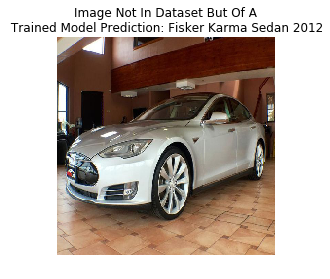

In [5]:
# Takes a file to test in the model
tesla_model_s = '../content/gdrive/My Drive/Software Engineering Practice/boundary_testing_images/tesla_model_s_2012.jpg'
# Opens the image and resizes the image to the correct size for the model
tesla_model_s = Image.open(tesla_model_s).resize(IMAGE_SHAPE)


# Places the image in an array
tesla_model_s = np.array(tesla_model_s)/255.0
tesla_model_s.shape

# Adds a batch dimension and passes the image to the model
result = car_classifier_model.predict(tesla_model_s[np.newaxis, ...])
result.shape

# Finds the top rated probability for the prediction
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

# Gets the label file from Google Drive and reads the .txt file
labels_path = '../content/gdrive/My Drive/Software Engineering Practice/training_names.txt'
car_class_labels = np.array(open(labels_path).read().splitlines())

# Plots the image with the prediction as the title
plt.imshow(tesla_model_s)
plt.axis('off')
predicted_class_name = car_class_labels[predicted_class]
_ = plt.title("Image Not In Dataset But Of A\n Trained Model Prediction: " + predicted_class_name)

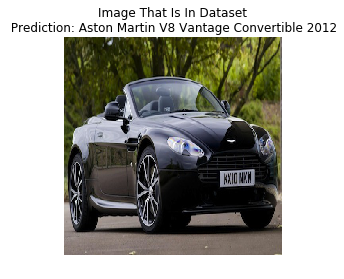

In [6]:
# Takes a file to test in the model
aston_martin = '../content/gdrive/My Drive/Software Engineering Practice/boundary_testing_images/aston_martin.jpg'
# Opens the image and resizes the image to the correct size for the model
aston_martin = Image.open(aston_martin).resize(IMAGE_SHAPE)


# Places the image in an array
aston_martin = np.array(aston_martin)/255.0
aston_martin.shape

# Adds a batch dimension and passes the image to the model
result = car_classifier_model.predict(aston_martin[np.newaxis, ...])
result.shape

# Finds the top rated probability for the prediction
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

# Gets the label file from Google Drive and reads the .txt file
labels_path = '../content/gdrive/My Drive/Software Engineering Practice/training_names.txt'
car_class_labels = np.array(open(labels_path).read().splitlines())

# Plots the image with the prediction as the title
plt.imshow(aston_martin)
plt.axis('off')
predicted_class_name = car_class_labels[predicted_class]
_ = plt.title("Image That Is In Dataset\n Prediction: " + predicted_class_name)

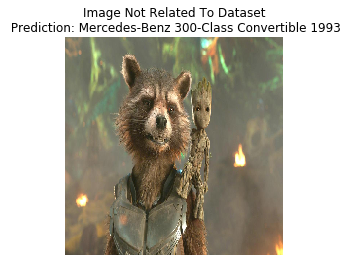

In [7]:
# Takes a file to test in the model
rocket_and_groot = '../content/gdrive/My Drive/Software Engineering Practice/boundary_testing_images/rocket_and_groot.jpg'
# Opens the image and resizes the image to the correct size for the model
rocket_and_groot = Image.open(rocket_and_groot).resize(IMAGE_SHAPE)
# Displays the resized image
rocket_and_groot

# Places the image in an array
rocket_and_groot = np.array(rocket_and_groot)/255.0
rocket_and_groot.shape

# Adds a batch dimension and passes the image to the model
result = car_classifier_model.predict(rocket_and_groot[np.newaxis, ...])
result.shape

# Finds the top rated probability for the prediction
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

# Gets the label file from Google Drive and reads the .txt file
labels_path = '../content/gdrive/My Drive/Software Engineering Practice/training_names.txt'
car_class_labels = np.array(open(labels_path).read().splitlines())

# Plots the image with the prediction as the title
plt.imshow(rocket_and_groot)
plt.axis('off')
predicted_class_name = car_class_labels[predicted_class]
_ = plt.title("Image Not Related To Dataset\n Prediction: " + predicted_class_name)